# MoReBo
MoReBo welcomes you!

![MoReBo Logo](web/static/MoReBo.jpg)

MoReBo Logo source: https://campk12.com/project/joydeep.chanda/movie-bot

- [Context](#context)
    - [Introduction](#introduction)
    - [Background](#background)
    - [Problem Statement](#problem-statement)
    - [Goals](#goals)
    - [Approach](#approach)
- [Explorative Data Analysis](#explorative-data-analysis)
    - [Overview of Data](#overview-of-data)
    - [Data Visualization](#data-visualization)
    - [Statistical Analysis](#statistical-analysis)
    - [Hypothesis Testing](#hypothesis-testing)
- [Unifying & Transformation](#unifying--transformation)
    - [Data Integration](#data-integration)
    - [Data Transformation](#data-transformation)
    - [Data Normalization](#data-normalization)
    - [Data Scaling](#data-scaling)
- [Data Cleansing](#data-cleansing)
    - [Data Cleaning](#data-cleaning)
    - [Outlier Detection](#outlier-detection)
    - [Missing Value Imputation](#missing-value-imputation)
    - [Duplicate Removal](#duplicate-removal)
- [Analysis & Validation](#analysis--validation)
    - [Model Selection](#model-selection)
    - [Model Validation](#model-validation)
    - [Model Evaluation Metrics](#model-evaluation-metrics)
    - [Cross-Validation](#cross-validation)
- [Feature Selection & Engineering](#feature-selection--engineering)
- [Appliance in Machine Learning](#appliance-in-machine-learning)
- [Appliance of XAI-Techniques](#appliance-of-xai-techniques)

## Context

### Introduction

The goal of this project is to create a machine learning model that recommends movies to users based on their movie preferences. This model will function similarly to recommendations from popular VOD providers like Netflix, Amazon Prime, and Disney Plus. To make movie recommendations, users can either input their favourite movies as well as handing in ratings for the movies they have watched. The implemented model in our web-application will give up to 15 recommendations, based on the initial input. 
Three different models have been created to try and solve the given problem. The Model Option 2 (SVD), is used in the frontend, as it has the best performance.

### Background

The rise of online streaming services has led to an explosion of movie choices for users. However, this abundance of choice can be overwhelming, and users may have difficulty finding movies that match their tastes. Machine learning models can be used to provide personalized recommendations to users, based on their movie preferences. Popular VOD providers like Netflix and Amazon Prime already use such models to make movie recommendations to their users. This project aims to create a similar model for recommending movies to users.

### Problem Statement

Picture this scenario:

You and your girlfriend want to watch a film on a cozy Sunday night. She mentions some films she really liked and some others she didn't like at all. The problem is that your Netflix account only takes into consideration your movie preferences. But tonight you really want to make your girlfriend happy and pick a film she will definetly like. You could try and guess a movie which she could like but you can never be really sure she will like it.

Now imagine if you could higher your chances of recommending a movie to your girlfriend which she will like for sure. That's where MoReBo comes in.

With MoReBo we want to provide users with personalized movie recommendations to make their movie-watching experience more enjoyable. To achieve this goal, we will be using Support Vector Machine and Logistic Regression models to predict which movies users will enjoy based on their movie preferences. We will evaluate the performance of these models and select the best one for the task. Finally, we will deploy the model in a user-friendly web application to make it accessible to a wide range of users.

### Installing packages based on Requirements.txt

In [67]:
# %pip install -r requirements.txt #TODO: add requirements.txt

## Explorative Data Analysis

To get enough data we are using the MovieLens 1M dataset from https://grouplens.org/datasets/movielens/. This dataset contains 1M ratings
made by 6'040 users for 3'900 movies. Additionally we aggregated our movies with metadata from https://omdbapi.com.

### Overview of Data

We import our data using pandas and then save the three datasets as dataframes.

In [68]:
import pandas as pd
import numpy as np

movies = pd.read_csv('data/movies_meta_data.csv', sep=';', engine='python')
users = pd.read_csv('data/users.dat', sep='::', engine='python', names=['userId', 'gender', 'age', 'occupation', 'zip-code'])
ratings = pd.read_csv('data/ratings.dat', sep='::', engine='python', names=['userId', 'movieId', 'rating', 'timestamp'])

Now let's take a closer look at the movies dataset.

In [69]:
movies.head()

,ml_movieId,ml_title,ml_genres,Title,Year,Rated,Released,Runtime,Genre,Director,...,imdbVotes,imdbID,Type,DVD,BoxOffice,Production,Website,Response,ml_year,totalSeasons
0,1,Toy Story,Animation|Children's|Comedy,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy",John Lasseter,...,"1,009,377",tt0114709,movie,23 Mar 2010,"$223,225,679",NaN,NaN,True,1995,NaN
1,2,Jumanji,Adventure|Children's|Fantasy,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family",Joe Johnston,...,"354,984",tt0113497,movie,NaN,"$100,499,940",NaN,NaN,True,1995,NaN
2,3,Grumpier Old Men,Comedy|Romance,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,...,"28,520",tt0113228,movie,15 May 2007,"$71,518,503",NaN,NaN,True,1995,NaN
3,4,Waiting to Exhale,Comedy|Drama,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,...,"11,434",tt0114885,movie,20 Jul 1999,"$67,052,156",NaN,NaN,True,1995,NaN
4,5,Father of the Bride Part II,Comedy,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,...,"39,573",tt0113041,movie,25 Jan 2005,"$76,594,107",NaN,NaN,True,1995,NaN


The dataset from movielens contains movies with the following 3 columns:
- MovieID: ID which movielens gave the movie
- Genres: A pipe seperated list of genres
- Titles: The title of the movie which corresponds to the title in IMDB. The title also includes the release year in brackets.
    
As this dataset lacks additional data we decided to aggregate it using data provided by omdbapi.com. This API can be queried with
a movie title and a year. The result contains additional data like the director, actors, ratings from IMDB. To fetch the data from the 
API we wrote and executed the script "get_meta_data.py" residing in this directory. The script reads all movies from our original movielens
dataset and queries the API using the title and the year. The results are saved to a new .csv file called movies_meta_data.csv. The new
dataset contains our original columns plus the new ones from omdbapi.com. Some movies were not found on omdbapi.com. These movies are
saved to the not_found_movies.csv file so they could be added manually. 
How much of the additional data is relevant will be examined at a later stage.

In [70]:
users.head()

,userId,gender,age,occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


The users dataset contains 5 columns.

-   userID: Helps to identify the user which rated the movie


-   gender: Shows the gender of the user


-   age: Gives the age group of the user. There are the following age groups:

    -   1 = 0-17
    -   18 = 18-24
    -   25 = 25-34
    -   35 = 35-44
    -   45 = 45-49
    -   50 = 50-55
    -   56 = 56+
    

     </p>

-   occupation: Display the occupation of the users. Here are the 20 different occupations:

    -   0:  other or not specified
    -   1:  academic/educator
    -   2:  artist
    -   3:  clerical/admin
    -   4:  college/grad student
    -   5:  customer service
    -   6:  doctor/health care
    -   7:  executive/managerial
    -   8:  farmer
    -   9:  homemaker
    -   10: K-12 student
    -   11: lawyer
    -   12: programmer
    -   13: retired
    -   14: sales/marketing
    -   15: scientist
    -   16: self-employed
    -   17: technician/engineer
    -   18: tradesman/craftsman
    -   19: unemployed
    -   20: writer
    </p>

-   zip-code: US-Zip-Codes from the village/city the user lives in 

In [71]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


The ratings dataset contains 4 columns.

- userId: Shows the userID which User gave the rating

- movieId: Shows the movieId from the rated movie

- rating: Shows the given rating, which is in range between 0-5

- timestamp: Shows the timestamp in seconds since the epoch as returned by time

### Data Visualization

To get a better overview of the data let's take a closer look below at some columns from the dataset.

First, let's look at the different genres of movies in the dataset. Since the genres are all in one column separated by a column, we first have to handle this separator and then plot a barchart.

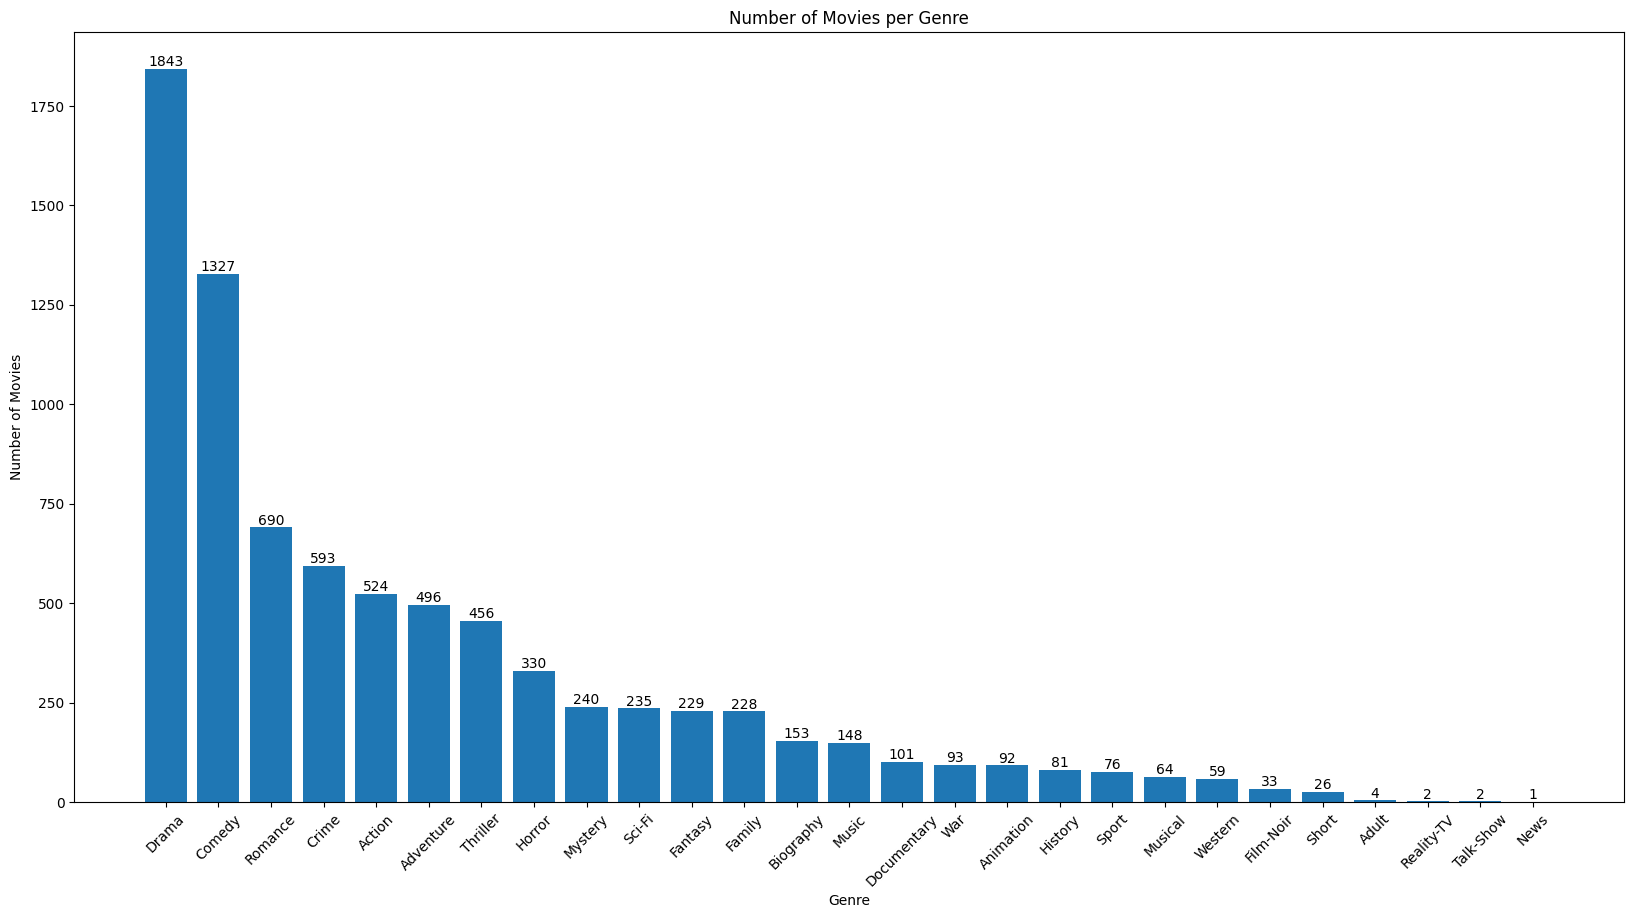

In [72]:
import matplotlib.pyplot as plt

# Create a barchart of the number of movies per genre
genre_counts = movies['Genre'].str.get_dummies(sep=', ').sum().sort_values(ascending=False)

plt.figure(figsize=(20,10))
plt.bar(genre_counts.index, genre_counts.values)
plt.xticks(rotation=45)

for i, count in enumerate(genre_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Number of Movies per Genre')
plt.show()


Our observations:

Drama is the most common genre with 1843 movies, followed by Comedy with 1327 movies.
Romance, Crime, Action, and Adventure are also popular genres, with movie counts ranging from 690 to 524.

Thriller, Horror, Mystery, Sci-Fi, and Fantasy genres have moderate representation, with movie counts ranging from 456 to 229.

Other genres like Family, Biography, Music, and Documentary have lower but still significant movie counts, ranging from 228 to 101.

Genres such as War, Animation, History, Sport, Musical, Western, and Film-Noir have comparatively fewer movies, with counts ranging from 93 to 59.

Genres like Short, Adult, Reality-TV, Talk-Show, and News have the lowest representation, with counts ranging from 26 to 1. These genres may be less common or specialized categories.

Next let's look at the year of release for the movies. We grouped the years into decades to have a better overview.

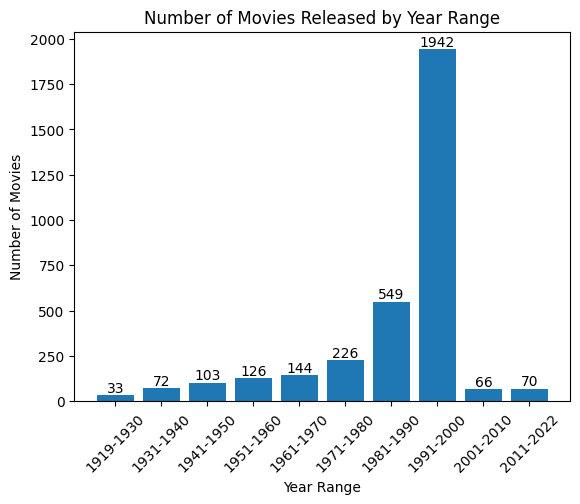

In [73]:
# define a custom function to map each year to its corresponding year range
def year_to_range(year):
    if isinstance(year, str):
        # extract the first four characters from the year string
        year = int(year[:4])
    if year >= 1919 and year <= 1930:
        return '1919-1930'
    elif year >= 1931 and year <= 1940:
        return '1931-1940'
    elif year >= 1941 and year <= 1950:
        return '1941-1950'
    elif year >= 1951 and year <= 1960:
        return '1951-1960'
    elif year >= 1961 and year <= 1970:
        return '1961-1970'
    elif year >= 1971 and year <= 1980:
        return '1971-1980'
    elif year >= 1981 and year <= 1990:
        return '1981-1990'
    elif year >= 1991 and year <= 2000:
        return '1991-2000'
    elif year >= 2001 and year <= 2010:
        return '2001-2010'
    elif year >= 2011 and year <= 2022:
        return '2011-2022'

# create a new column in the dataframe to group the years into year ranges
movies['Year Range'] = movies['Year'].apply(year_to_range)

# use pandas value_counts function to count the number of movies in each year range
movies_per_year_range = movies['Year Range'].value_counts().sort_index()

# create a bar chart using matplotlib
plt.bar(movies_per_year_range.index, movies_per_year_range.values)

# add labels to the bars
for i, value in enumerate(movies_per_year_range.values):
    plt.text(i, value, str(value), ha='center', va='bottom')

# set the chart title and axis labels
plt.title('Number of Movies Released by Year Range')
plt.xlabel('Year Range')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)

# display the chart
plt.show()

We see that the years between 1991 and 2000 are by far the most present in the dataset. This should certainly be considered when working on the model since the year can be a factor for someone to consider a better rating of the movie. However just because a certain timespan is more common in the dataset doesn't mean those movies have generally a higher or lower rating. We could counteract this by deleting some entries from the specific years which appear the most.

Next, let's look at the users. We first want to know if there is a class imbalance for the feature "gender".

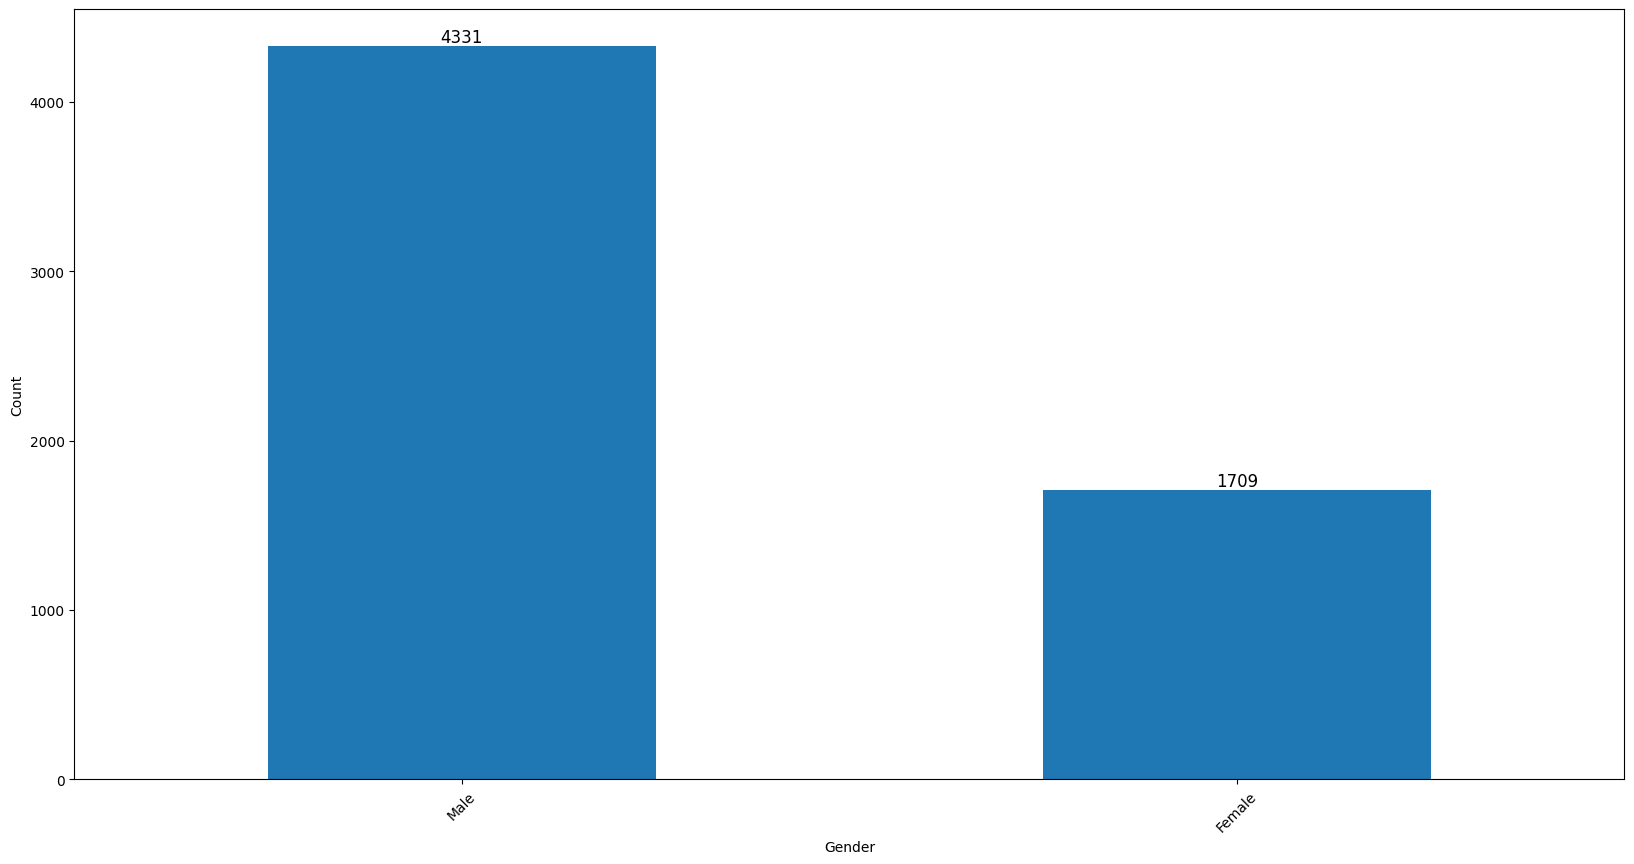

In [74]:
# Map gender codes to labels
gender_labels = {'M': 'Male', 'F': 'Female'}

# Create a barchart for the genders in the users dataframe
ax = users['gender'].map(gender_labels).value_counts().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Gender')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(users['gender'].map(gender_labels).value_counts()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.show()

We see that there are more than twice as many ratings from male users in comparison to female users. It is certainly important to consider either undersampling the majority class or oversampling the minority class to prevent the class imbalance present in the dataset.

Another approach could be weighting. Assigning weights to individual data points based on gender can help account for the imbalance. By giving appropriate weights to ratings from each gender, the analysis can account for the different contributions of males and females.

Next, let's consider the age of the users. We grouped the age in categories based on the actual meaning provided by the movielens dataset.

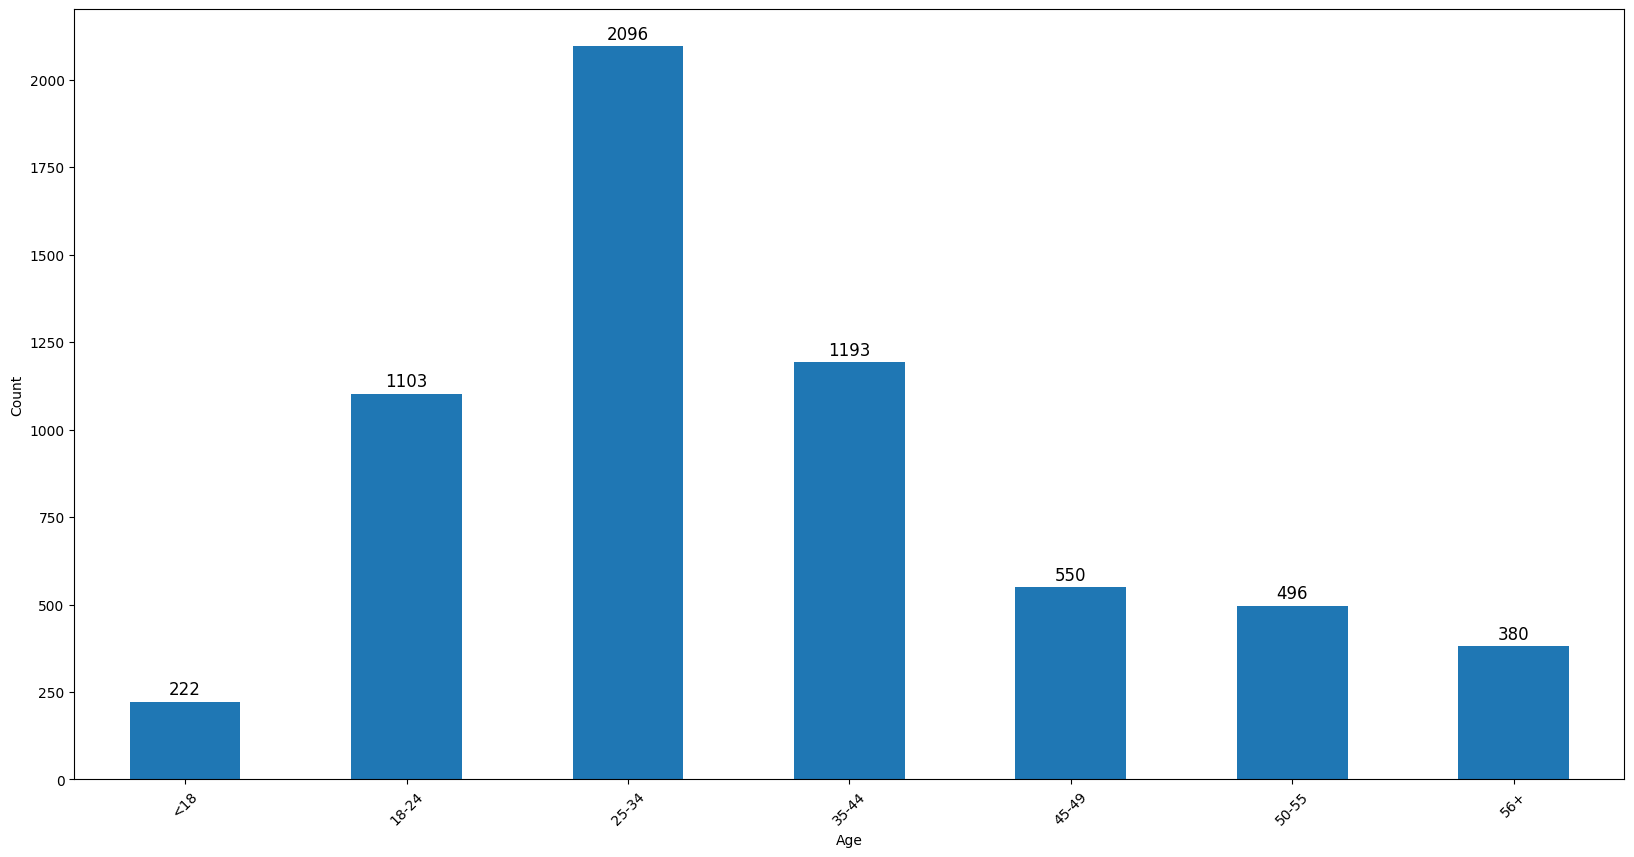

In [75]:
    # Define the age categories
    age_categories = ['<18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

    # Create a barchart for the ages in the users dataframe
    ax = users['age'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

    # Set the x-axis labels to the age categories
    ax.set_xticklabels(age_categories)

    # Set the x- and y-axis labels
    ax.set_xlabel('Age')
    ax.set_ylabel('Count')

    # Add annotations for the count above each bar
    for i, v in enumerate(users['age'].value_counts().sort_index()):
        ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)
        
    plt.xticks(rotation=45)
    plt.show()

We see that the age group between 25-34 has given the most ratings. The adjacent age groups above and below are ranked 2nd and 3rd respectively. Non-adults have the lowest count of ratings. The older age groups have progressively lower counts.

It has to be taken into consideration that the defined age groups are not in proportion. It is normal to see that an age group from 35-44 (10 years) have a higher count than an age group from 45-49 (5 years). The age groups are pre-defined in the given dataset. The age was not an absolute number in the users dataset. This means this is the best possible insight we can gain about the age of the users giving ratings.

Next, we look at the occupation type of the users. Every occupation who appears at least once was considered as an own label.

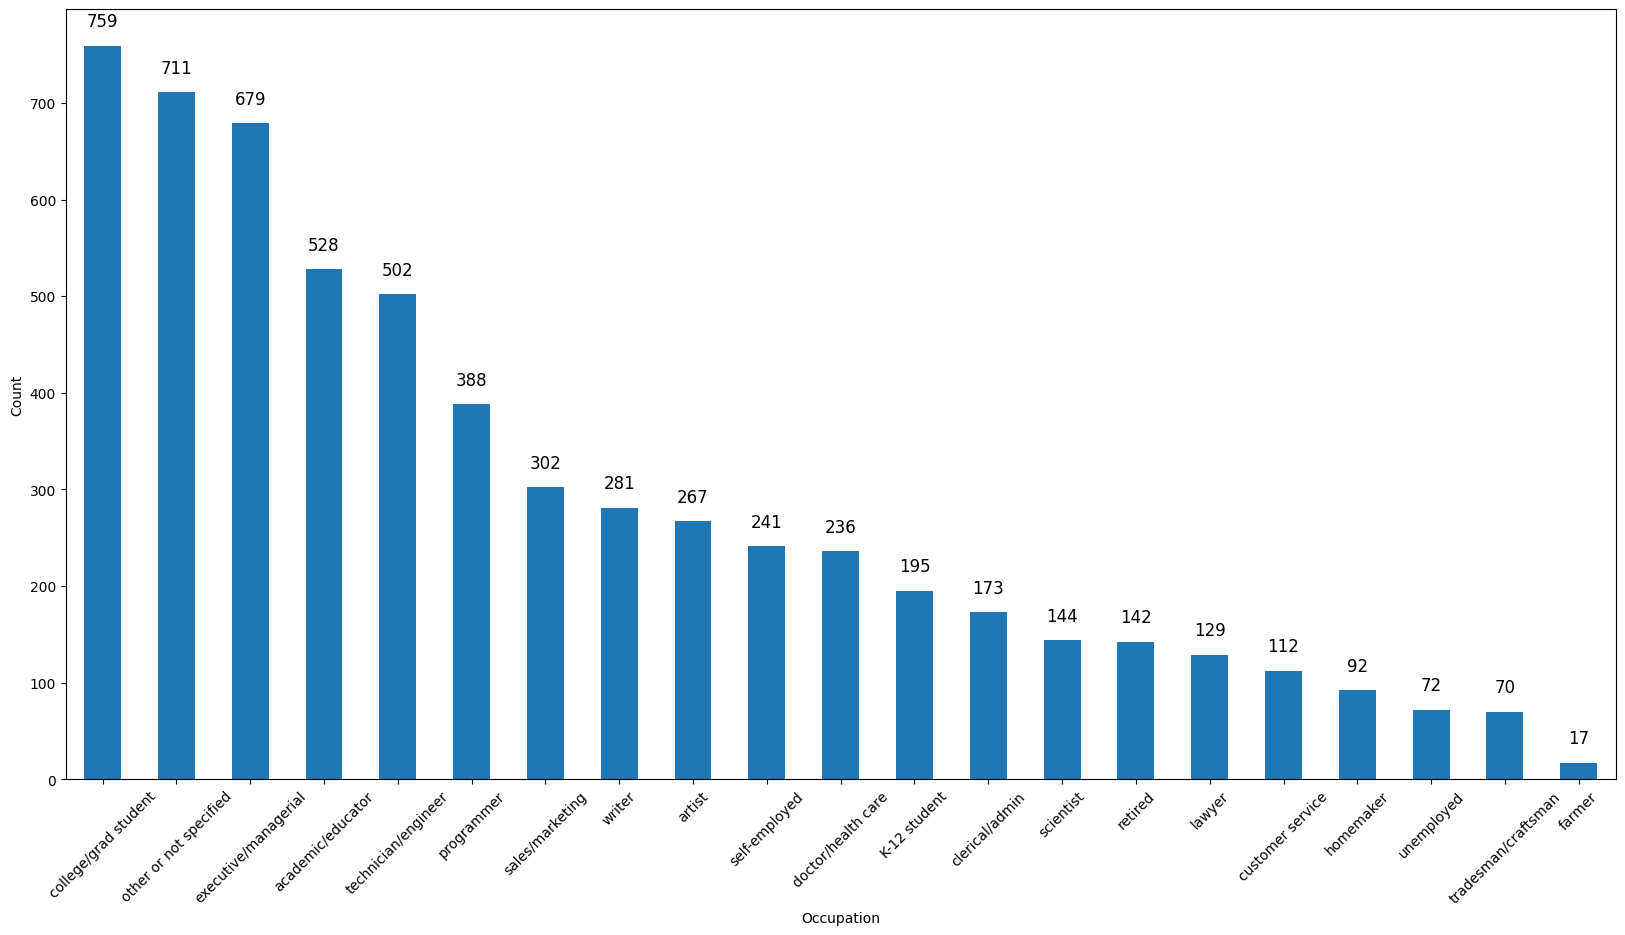

In [76]:
# Define a dictionary to map numeric occupation values to text labels
occupation_labels = {0: "other or not specified",
                     1: "academic/educator",
                     2: "artist",
                     3: "clerical/admin",
                     4: "college/grad student",
                     5: "customer service",
                     6: "doctor/health care",
                     7: "executive/managerial",
                     8: "farmer",
                     9: "homemaker",
                     10: "K-12 student",
                     11: "lawyer",
                     12: "programmer",
                     13: "retired",
                     14: "sales/marketing",
                     15: "scientist",
                     16: "self-employed",
                     17: "technician/engineer",
                     18: "tradesman/craftsman",
                     19: "unemployed",
                     20: "writer"}

# Replace the numeric occupation values with text labels using the map method
users_plt = users.copy()
users_plt['occupation'] = users_plt['occupation'].map(occupation_labels)

# Plot a bar chart of the occupations in the users dataframe
fig, ax = plt.subplots(figsize=(20, 10))
users_plt['occupation'].value_counts().plot(kind='bar', ax=ax)

# Add annotations for the count above each bar
for i, v in enumerate(users_plt['occupation'].value_counts()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

# Set the x- and y-axis labels
ax.set_xlabel('Occupation')
ax.set_ylabel('Count')

plt.xticks(rotation=45)
plt.show()

The occupation category with the highest count is "college/grad student" with 759 users, indicating a relatively larger number of users in this occupation category.

The occupation categories "others/not specified" and "executive/managerial" also have notable counts, with 711 and 679 users respectively.

There is a diverse range of occupation categories represented in the dataset, including academic/educator, technician/engineer, programmer, sales/marketing, writer, artist, self-employed, doctor/health-care, K-12 student, clerical/admin, scientist, retired, lawyer, customer service, homemaker, unemployed, tradesman/craftsman, and farmer.

The data provides insights into the distribution of users across different occupations. It suggests that the dataset includes users from various professional backgrounds, indicating a diverse user base.

The occupation categories with relatively lower counts, such as tradesman/craftsman, farmer, and unemployed, indicate a smaller representation of users in these specific occupations within the dataset.

There is no big gap between the different occupations but it still results in a difference of 191% between the most and the least common occupation.

Next, let's analyze how the ratings are balanced in the dataset.
The ratings are between 1 and 5 with 1 being the worst rating and 5 the best rating give to a movie.

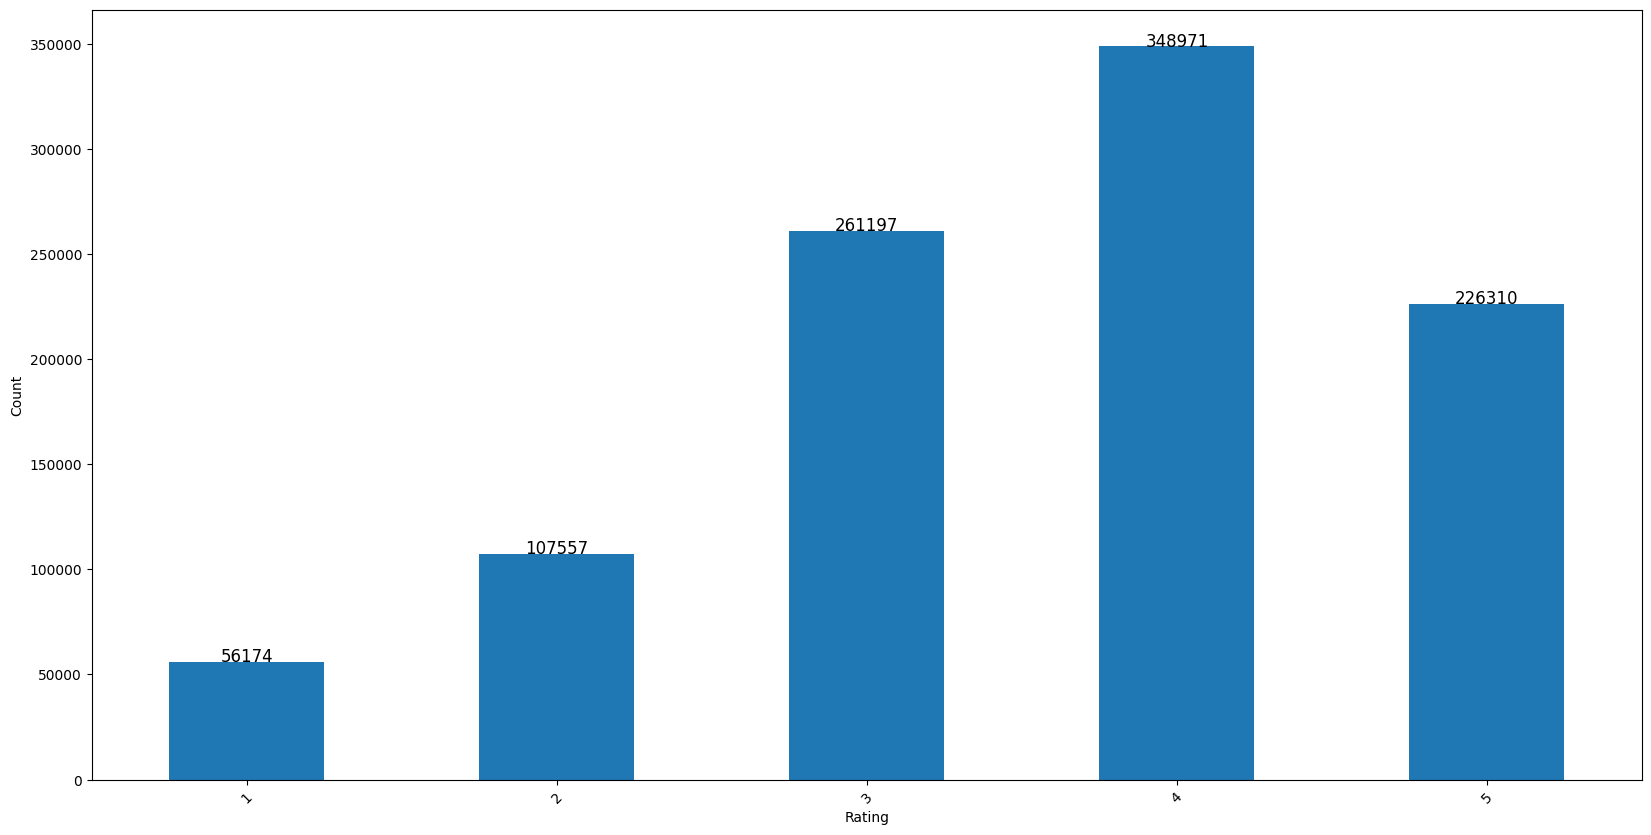

In [77]:
# Create a barchart for the ratings in the ratings dataframe
ax = ratings['rating'].value_counts().sort_index().plot(kind='bar', figsize=(20,10))

# Set the x- and y-axis labels
ax.set_xlabel('Rating')
ax.set_ylabel('Count')

# Add annotations for the count above each bar
for i, v in enumerate(ratings['rating'].value_counts().sort_index()):
    ax.annotate(str(v), xy=(i, v + 20), ha='center', fontsize=12)

plt.xticks(rotation=45)
plt.show()

Our observations based on this distribution of ratings:

1. Skewed Distribution: The ratings distribution is slightly skewed to the higher ratings (4 and 5) and away from the lower ratings (1 and 2). This indicates that the majority of users tend to rate movies more positively than negatively.

2. Moderate Spread: The counts of ratings 3, 4, and 5 are relatively close to each other, indicating a moderate spread of ratings in the positive range. This suggests that a significant portion of the movies in the dataset received favorable ratings from users.

3. Most Frequent Rating: Rating 4 has the highest count, indicating that it is the most frequently assigned rating among users in the dataset. This suggests that a substantial number of movies received a rating of 4, making it a common rating choice for users.

4. Low Ratings: While the counts of ratings 1 and 2 are relatively smaller compared to the higher ratings, they still indicate the presence of movies that received lower ratings. These ratings could correspond to movies that were disliked or considered of poor quality by users.

In conclusion, let's analyze how many ratings a user gives. To show this we use a boxplot. To visualize the boxplot better we show the average with a red dotted line. The numbers for the average and the interquartile range are shown as well.

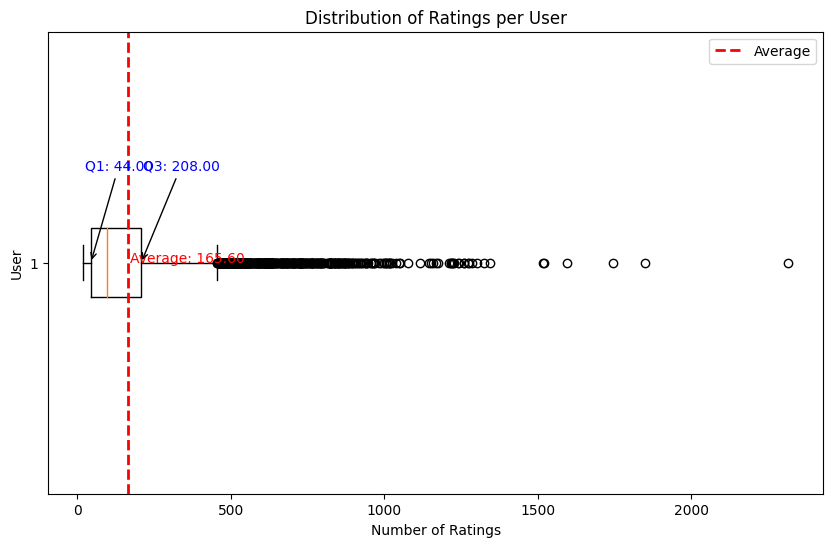

In [78]:

# Calculate the number of ratings per user
ratings_per_user = ratings.groupby('userId')['rating'].count()

# Calculate the average number of ratings per user
average_ratings = ratings_per_user.mean()

# Calculate the quartiles
q1 = np.percentile(ratings_per_user, 25)
q3 = np.percentile(ratings_per_user, 75)

# Calculate the interquartile range (IQR)
iqr = q3 - q1

# Plot the boxplot
plt.figure(figsize=(10, 6))
boxplot_dict=plt.boxplot(ratings_per_user, vert=False)
plt.axvline(x=average_ratings, color='red', linestyle='--', linewidth=2, label='Average')
plt.text(average_ratings + 5, 1, f'Average: {average_ratings:.2f}', color='red')

# Annotation for Q1
plt.annotate(f'Q1: {q1:.2f}', xy=(q1, 1), xytext=(q1 - 20, 1.2),
             arrowprops=dict(facecolor='blue', arrowstyle="->"), color='blue')

# Annotation for Q3
plt.annotate(f'Q3: {q3:.2f}', xy=(q3, 1), xytext=(q3 + 5, 1.2),
             arrowprops=dict(facecolor='blue', arrowstyle="->"), color='blue')

plt.xlabel('Number of Ratings')
plt.ylabel('User')
plt.title('Distribution of Ratings per User')
plt.legend()
plt.show()

Our observations for this boxplot:

1. Distribution: The data represents the number of ratings per user. The boxplot visualizes the distribution of this data.

2. Quartiles: The first quartile (Q1) is 44.0, which means that 25% of the users have 44 or fewer ratings. The third quartile (Q3) is 208.0, indicating that 75% of the users have 208 or fewer ratings.

3. Interquartile Range (IQR): The IQR can be calculated by subtracting Q1 from Q3. In this case, the IQR is 208.0 - 44.0 = 164.0. The IQR represents the range containing the middle 50% of the data.

4. Average: The average number of ratings per user is 165.60. This value is indicated by a red dashed line in the plot.

5. Outliers: The plot indicates the presence of outliers starting from the value of 500 and onwards. Outliers are data points that fall significantly outside the range of most other data points. These values, being significantly higher than the majority of ratings per user, are represented as individual points outside the main box of the boxplot.

6. Spread and Skewness: Since the IQR is relatively large compared to the average, it suggests that the distribution of ratings per user is skewed to the right. The presence of outliers further supports this observation, indicating a long tail of users with a high number of ratings.

In summary, the data shows that the majority of users have a relatively low number of ratings per user (Q1 = 44.0). However, there is a subset of users with a significantly higher number of ratings (outliers), resulting in a right-skewed distribution. The average number of ratings per user is 165.60, indicating a moderate overall level of ratings.

### Statistical Analysis

C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\306776564.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 0].set_xticklabels(genre_counts.index, rotation=45)
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\306776564.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 1].set_xticklabels(movies_per_year_range.index, rotation=45)
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\306776564.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0, 2].set_xticklabels(users['gender'].map(gender_labels).value_counts().index, rotation=45)
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\306776564.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1, 1].set_xticklabels(users_plt['occupation'].value_counts().index, rotation=45)


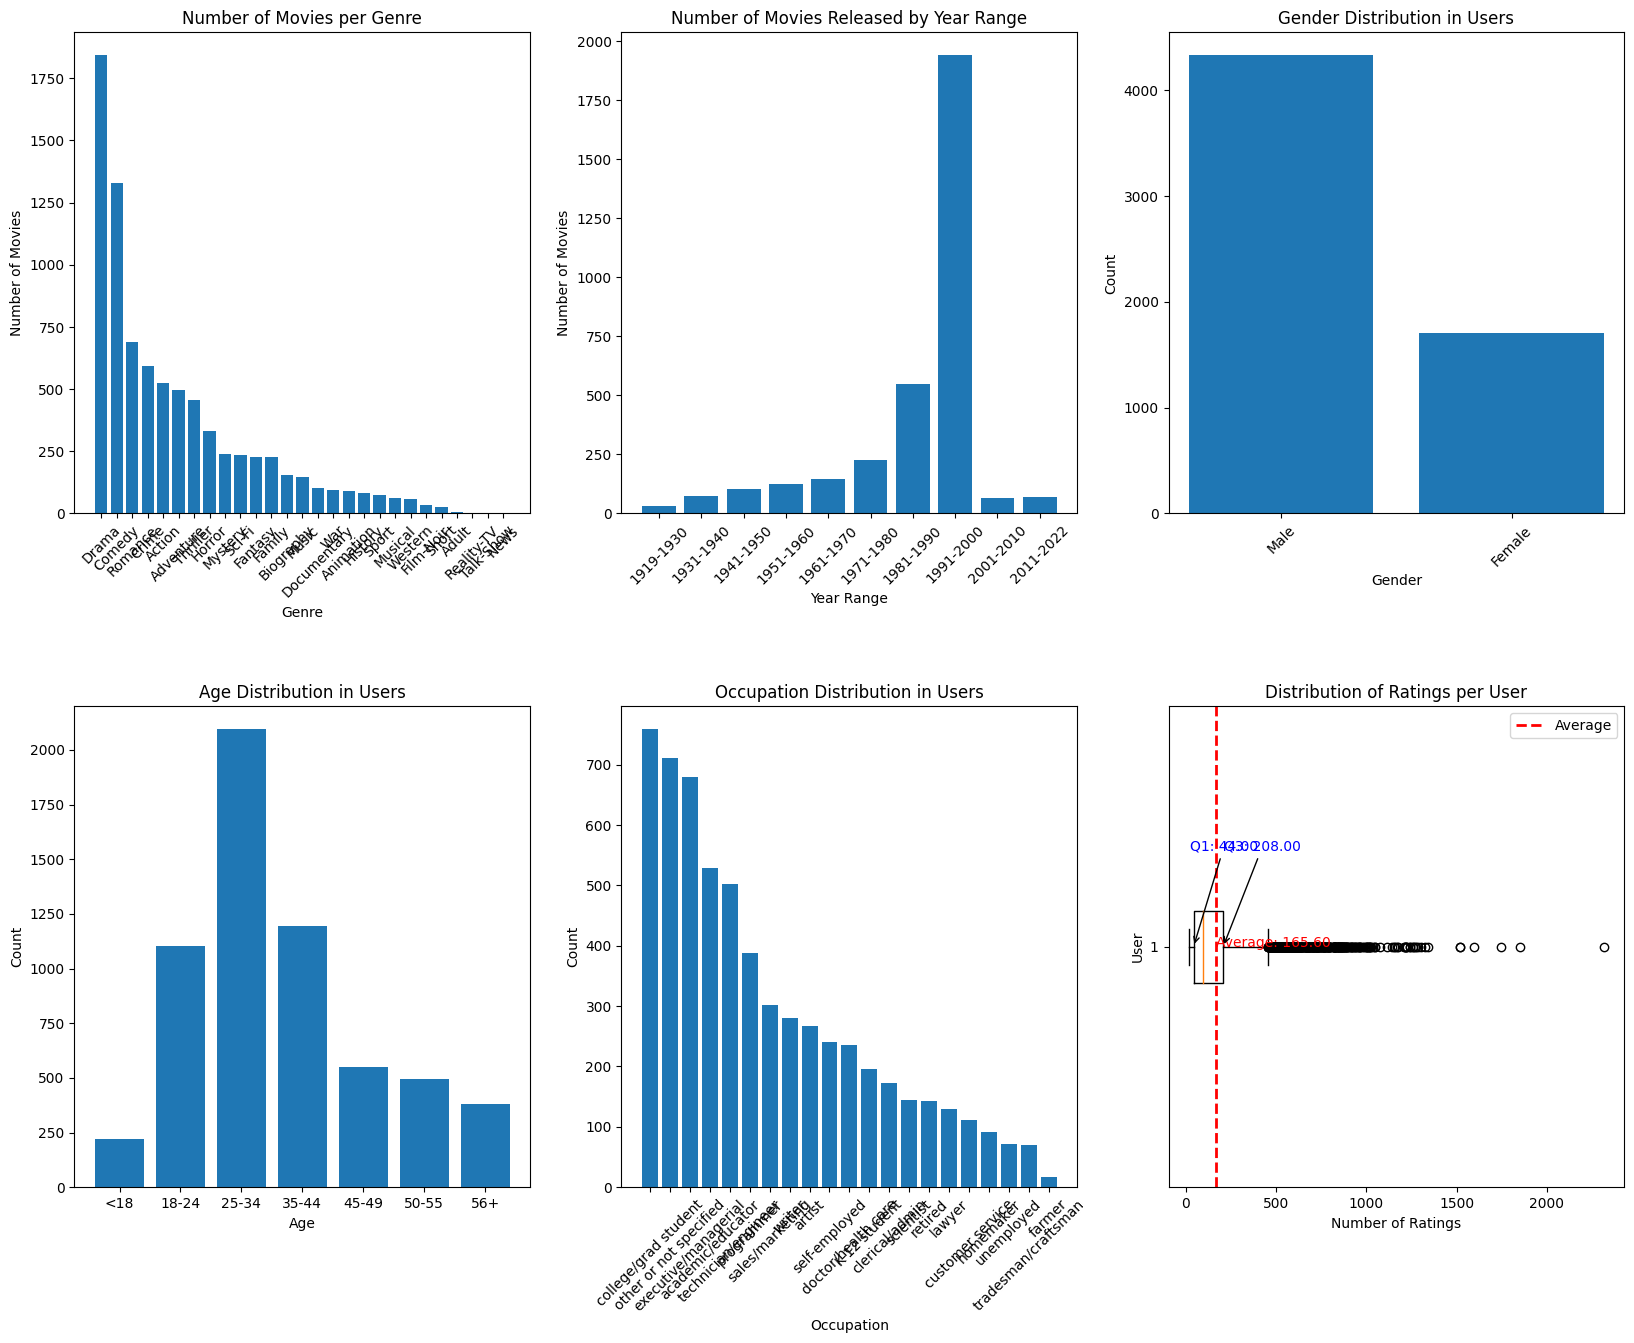

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Create a figure with a grid layout
fig, axs = plt.subplots(2, 3, figsize=(20, 15))

# Adjust the spacing between subplots
fig.subplots_adjust(hspace=0.4)

# Plot 1: Number of Movies per Genre
axs[0, 0].bar(genre_counts.index, genre_counts.values)
axs[0, 0].set_xticklabels(genre_counts.index, rotation=45)
axs[0, 0].set_xlabel('Genre')
axs[0, 0].set_ylabel('Number of Movies')
axs[0, 0].set_title('Number of Movies per Genre')

# Plot 2: Number of Movies Released by Year Range
axs[0, 1].bar(movies_per_year_range.index, movies_per_year_range.values)
axs[0, 1].set_xticklabels(movies_per_year_range.index, rotation=45)
axs[0, 1].set_xlabel('Year Range')
axs[0, 1].set_ylabel('Number of Movies')
axs[0, 1].set_title('Number of Movies Released by Year Range')

# Plot 3: Gender Distribution in Users
axs[0, 2].bar(users['gender'].map(gender_labels).value_counts().index,
              users['gender'].map(gender_labels).value_counts().values)
axs[0, 2].set_xticklabels(users['gender'].map(gender_labels).value_counts().index, rotation=45)
axs[0, 2].set_xlabel('Gender')
axs[0, 2].set_ylabel('Count')
axs[0, 2].set_title('Gender Distribution in Users')

# Plot 4: Age Distribution in Users
axs[1, 0].bar(age_categories, users['age'].value_counts().sort_index().values)
axs[1, 0].set_xlabel('Age')
axs[1, 0].set_ylabel('Count')
axs[1, 0].set_title('Age Distribution in Users')

# Plot 5: Occupation Distribution in Users
axs[1, 1].bar(users_plt['occupation'].value_counts().index, users_plt['occupation'].value_counts().values)
axs[1, 1].set_xticklabels(users_plt['occupation'].value_counts().index, rotation=45)
axs[1, 1].set_xlabel('Occupation')
axs[1, 1].set_ylabel('Count')
axs[1, 1].set_title('Occupation Distribution in Users')

# Plot 6: Distribution of Ratings per User
average_ratings = ratings_per_user.mean()
boxplot_dict = axs[1, 2].boxplot(ratings_per_user, vert=False)
axs[1, 2].axvline(x=average_ratings, color='red', linestyle='--', linewidth=2, label='Average')
axs[1, 2].text(average_ratings + 5, 1, f'Average: {average_ratings:.2f}', color='red')
axs[1, 2].annotate(f'Q1: {q1:.2f}', xy=(q1, 1), xytext=(q1 - 20, 1.2),
                   arrowprops=dict(facecolor='blue', arrowstyle="->"), color='blue')
axs[1, 2].annotate(f'Q3: {q3:.2f}', xy=(q3, 1), xytext=(q3 + 5, 1.2),
                   arrowprops=dict(facecolor='blue', arrowstyle="->"), color='blue')
axs[1, 2].set_xlabel('Number of Ratings')
axs[1, 2].set_ylabel('User')
axs[1, 2].set_title('Distribution of Ratings per User')
axs[1, 2].legend()

# Display the grid of plots
plt.show()


The statistical analysis of the dataset revealed several important findings that provide valuable insights into the characteristics of the movie ratings dataset. The analysis encompassed various aspects, including genre distribution, movie release years, gender distribution among users, age distribution among users, occupation distribution among users, and the distribution of ratings per user.

The genre distribution analysis highlighted that Drama is the most common genre, closely followed by Comedy, Romance, Crime, Action, and Adventure. Thriller, Horror, Mystery, Sci-Fi, and Fantasy genres also had moderate representation, while other genres like Family, Biography, Music, and Documentary had lower but still significant movie counts. On the other hand, genres such as War, Animation, History, Sport, Musical, Western, and Film-Noir had comparatively fewer movies. Additionally, genres like Short, Adult, Reality-TV, Talk-Show, and News had the lowest representation, indicating their niche or less common nature.

Examining the movie release years revealed that the dataset contained a significantly higher number of movies released between 1991 and 2000. While it is important to consider this imbalance in the dataset, it is crucial to note that the prevalence of movies from certain years does not inherently imply higher or lower movie ratings. To mitigate the impact of this skewness, it may be beneficial to consider removing some entries from the specific years that appear most frequently.

The analysis of gender distribution among users indicated that there were more than twice as many ratings from male users compared to female users. This gender imbalance should be taken into consideration when analyzing the data. To address this issue, techniques such as undersampling the majority class or oversampling the minority class can be employed. Additionally, assigning weights to individual data points based on gender can help account for the imbalance and provide a more balanced analysis.

Analyzing the age distribution among users revealed that the age group between 25-34 had given the most ratings, followed by adjacent age groups. Notably, non-adults had the lowest count of ratings. It is important to recognize that the age groups in the dataset are pre-defined and do not provide the precise age of the users. However, these predefined age groups still offer valuable insights into the age distribution of the users providing ratings.

The examination of occupation distribution among users highlighted that "college/grad student" had the highest count, indicating a relatively larger number of users in this occupation category. Other notable occupation categories included "others/not specified" and "executive/managerial." The dataset encompassed a diverse range of occupation categories, representing users from various professional backgrounds and suggesting a diverse user base. Some occupations had lower representation within the dataset, indicating a smaller proportion of users in those specific occupations.

Analyzing the distribution of ratings per user yielded several key observations. The ratings distribution displayed a slight skewness toward higher ratings (4 and 5) and away from lower ratings (1 and 2), indicating that the majority of users tended to rate movies more positively than negatively. Ratings 3, 4, and 5 exhibited a moderate spread, indicating a significant number of movies receiving favorable ratings. Rating 4 emerged as the most frequently assigned rating, suggesting its popularity among users. However, lower ratings (1 and 2) were also present, representing movies that were disliked or considered of poor quality by users.

Finally, the analysis of the distribution of ratings per user through the boxplot visualization revealed valuable insights. The boxplot illustrated the quartiles and interquartile range (IQR) of the data, indicating that 25% of users had 44 or fewer ratings, while 75% had 208 or fewer ratings. The presence of outliers beyond the upper whisker demonstrated a subset of users with a significantly higher number of ratings. The average number of ratings per user was determined to be 165.60, indicating a moderate overall level of ratings per user.

Overall, the statistical analysis of the dataset provided meaningful insights into various aspects of the movie ratings data. These findings should be considered when further exploring and modeling the dataset, ensuring appropriate handling of genre distribution, movie release years, gender distribution, age distribution, occupation distribution, and the distribution of ratings per user.

### Hypothesis Testing

In [80]:
# Merge the data
merged = pd.merge(movies, ratings, left_on='ml_movieId', right_on='movieId', how='inner')
merged = pd.merge(merged, users, on='userId', how='inner')
merged.head()

,ml_movieId,ml_title,ml_genres,Title,Year,Rated,Released,Runtime,Genre,Director,...,totalSeasons,Year Range,userId,movieId,rating,timestamp,gender,age,occupation,zip-code
0,1,Toy Story,Animation|Children's|Comedy,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy",John Lasseter,...,NaN,1991-2000,1,1,5,978824268,F,1,10,48067
1,48,Pocahontas,Animation|Children's|Musical|Romance,Pocahontas,1995,G,23 Jun 1995,81 min,"Animation, Adventure, Drama","Mike Gabriel, Eric Goldberg",...,NaN,1991-2000,1,48,5,978824351,F,1,10,48067
2,150,Apollo 13,Drama,Apollo 13,1995,PG,30 Jun 1995,140 min,"Adventure, Drama, History",Ron Howard,...,NaN,1991-2000,1,150,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantasy|Sci-Fi,Star Wars: Episode IV - A New Hope,1977,PG,25 May 1977,121 min,"Action, Adventure, Fantasy",George Lucas,...,NaN,1971-1980,1,260,4,978300760,F,1,10,48067
4,527,Schindler's List,Drama|War,Schindler's List,1993,R,04 Feb 1994,195 min,"Biography, Drama, History",Steven Spielberg,...,NaN,1991-2000,1,527,5,978824195,F,1,10,48067


In [81]:
import pandas as pd
from scipy.stats import ttest_ind

# Filter the dataset to separate ratings given by male and female users into two separate dataframes
# Step 1: Data Preparation
male_ratings = merged[merged['gender'] == 'M']['rating']
female_ratings = merged[merged['gender'] == 'F']['rating']

# Step 2: Descriptive Statistics
male_mean_rating = male_ratings.mean()
female_mean_rating = female_ratings.mean()

print("Average rating by male users:", male_mean_rating)
print("Average rating by female users:", female_mean_rating)

# Step 3: Hypothesis Testing
t_stat, p_value = ttest_ind(male_ratings, female_ratings)

# Step 4: Test Result Interpretation
alpha = 0.05

print("t-statistic:", t_stat)
print("p-value:", p_value)

if p_value < alpha:
    print("Reject the null hypothesis. There is a slight difference in the average ratings between male and female users.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average ratings between male and female users.")

Average rating by male users: 3.565066125691828
Average rating by female users: 3.616489950531013
t-statistic: -19.25379833979706
p-value: 1.360991654555169e-82
Reject the null hypothesis. There is a slight difference in the average ratings between male and female users.


In [82]:
merged.head

<bound method NDFrame.head of         ml_movieId                            ml_title  \
0                1                           Toy Story   
1               48                          Pocahontas   
2              150                           Apollo 13   
3              260  Star Wars: Episode IV - A New Hope   
4              527                    Schindler's List   
...            ...                                 ...   
938616        3793                               X-Men   
938617        3826                          Hollow Man   
938618        3863                            The Cell   
938619        3897                       Almost Famous   
938620        3952                       The Contender   

                                   ml_genres  \
0                Animation|Children's|Comedy   
1       Animation|Children's|Musical|Romance   
2                                      Drama   
3            Action|Adventure|Fantasy|Sci-Fi   
4                                

In [83]:
import numpy as np
import scipy.stats as stats

# Selecting ratings based on age groups
ratings_age_group_1 = merged.loc[merged['age'] == '18-24', 'rating'].dropna().astype(float)
ratings_age_group_2 = merged.loc[merged['age'] == '25-34', 'rating'].dropna().astype(float)
ratings_age_group_3 = merged.loc[merged['age'] == '35-44', 'rating'].dropna().astype(float)
ratings_age_group_4 = merged.loc[merged['age'] == '45-49', 'rating'].dropna().astype(float)

# Perform one-way ANOVA test
f_statistic, p_value = stats.f_oneway(ratings_age_group_1, ratings_age_group_2, ratings_age_group_3, ratings_age_group_4)

# Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)


F-Statistic: nan
p-value: nan


c:\Users\jansc\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_stats_py.py:3869: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


## Data Cleaning

Before we start doing anything we want to remove the features we are not using in our model.

In [84]:
movies.columns

Index(['ml_movieId', 'ml_title', 'ml_genres', 'Title', 'Year', 'Rated',
       'Released', 'Runtime', 'Genre', 'Director', 'Writer', 'Actors', 'Plot',
       'Language', 'Country', 'Awards', 'Poster', 'Ratings', 'Metascore',
       'imdbRating', 'imdbVotes', 'imdbID', 'Type', 'DVD', 'BoxOffice',
       'Production', 'Website', 'Response', 'ml_year', 'totalSeasons',
       'Year Range'],
      dtype='object')

In [85]:
movies_dropped = movies[['ml_movieId', 'Title', 'Year', 'Released', 'Runtime', 'Genre', 'Ratings', 'Metascore', 'imdbRating', 'imdbVotes', 'BoxOffice']]
movies_dropped.head()

,ml_movieId,Title,Year,Released,Runtime,Genre,Ratings,Metascore,imdbRating,imdbVotes,BoxOffice
0,1,Toy Story,1995,22 Nov 1995,81 min,"Animation, Adventure, Comedy","[{'Source': 'Internet Movie Database', 'Value'...",96.0,8.3,"1,009,377","$223,225,679"
1,2,Jumanji,1995,15 Dec 1995,104 min,"Adventure, Comedy, Family","[{'Source': 'Internet Movie Database', 'Value'...",39.0,7.0,"354,984","$100,499,940"
2,3,Grumpier Old Men,1995,22 Dec 1995,101 min,"Comedy, Romance","[{'Source': 'Internet Movie Database', 'Value'...",46.0,6.6,"28,520","$71,518,503"
3,4,Waiting to Exhale,1995,22 Dec 1995,124 min,"Comedy, Drama, Romance","[{'Source': 'Internet Movie Database', 'Value'...",NaN,5.9,"11,434","$67,052,156"
4,5,Father of the Bride Part II,1995,08 Dec 1995,106 min,"Comedy, Family, Romance","[{'Source': 'Internet Movie Database', 'Value'...",49.0,6.0,"39,573","$76,594,107"


Let's have a look at the number of missing values for every column. We can see that we have a couple of missing values that we need to deal with.

In [86]:
movies_dropped.isna().sum()

ml_movieId       0
Title            0
Year             0
Released        26
Runtime         12
Genre            3
Ratings          0
Metascore     1189
imdbRating      20
imdbVotes       19
BoxOffice      716
dtype: int64

We drop Metascore because it contains too many NA values. About 1/3 of our movies do not have a Metascore.

In [87]:
movies_dropped.drop(['Metascore'], axis=1, inplace=True)
movies_dropped.head()

C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\1371035789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_dropped.drop(['Metascore'], axis=1, inplace=True)


,ml_movieId,Title,Year,Released,Runtime,Genre,Ratings,imdbRating,imdbVotes,BoxOffice
0,1,Toy Story,1995,22 Nov 1995,81 min,"Animation, Adventure, Comedy","[{'Source': 'Internet Movie Database', 'Value'...",8.3,"1,009,377","$223,225,679"
1,2,Jumanji,1995,15 Dec 1995,104 min,"Adventure, Comedy, Family","[{'Source': 'Internet Movie Database', 'Value'...",7.0,"354,984","$100,499,940"
2,3,Grumpier Old Men,1995,22 Dec 1995,101 min,"Comedy, Romance","[{'Source': 'Internet Movie Database', 'Value'...",6.6,"28,520","$71,518,503"
3,4,Waiting to Exhale,1995,22 Dec 1995,124 min,"Comedy, Drama, Romance","[{'Source': 'Internet Movie Database', 'Value'...",5.9,"11,434","$67,052,156"
4,5,Father of the Bride Part II,1995,08 Dec 1995,106 min,"Comedy, Family, Romance","[{'Source': 'Internet Movie Database', 'Value'...",6.0,"39,573","$76,594,107"


For the columns 'imdbRating', 'imdbVotes', 'BoxOffice' and 'Runtime' we substitute the missing values with the mean.

In [88]:
import re

# Fill missing 'imdbRating' values with the mean
movies_dropped['imdbRating'].fillna(movies_dropped['imdbRating'].mean(), inplace=True)

# Round the 'imdbRating' values to one decimal place
movies_dropped['imdbRating'] = movies_dropped['imdbRating'].round(decimals=1)

# Convert the 'imdbVotes' column to float type using regular expressions
movies_dropped['imdbVotes'] = movies_dropped['imdbVotes'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)) if isinstance(x, str) else x)

# Fill in missing values with mean
movies_dropped['imdbVotes'].fillna(movies_dropped['imdbVotes'].mean(), inplace=True)

# Round the 'imdbVotes' values to zero decimal places
movies_dropped['imdbVotes'] = movies_dropped['imdbVotes'].round(decimals=0)

# Convert the 'BoxOffice' column to float type using regular expressions
movies_dropped['BoxOffice'] = movies_dropped['BoxOffice'].apply(lambda x: float(re.sub(r'[^\d.]', '', x)) if isinstance(x, str) else x)

# Fill in missing values with mean
movies_dropped['BoxOffice'].fillna(movies_dropped['BoxOffice'].mean(), inplace=True)

# Round the 'BoxOffice' values to zero decimal places
movies_dropped['BoxOffice'] = movies_dropped['BoxOffice'].round(decimals=0)

# Convert the 'Runtime' column from minutes to hours
movies_dropped['Runtime'] = movies_dropped['Runtime'].apply(lambda x: int(re.sub(r'\D', '', x)) / 60 if isinstance(x, str) else x)

# Fill in missing values with mean
movies_dropped['Runtime'].fillna(movies_dropped['Runtime'].mean(), inplace=True)

C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\2342669516.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_dropped['imdbRating'].fillna(movies_dropped['imdbRating'].mean(), inplace=True)
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\2342669516.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_dropped['imdbRating'] = movies_dropped['imdbRating'].round(decimals=1)
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\2342669516.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

Now let's see how many missing values remain.

In [89]:
movies_dropped.isna().sum()

ml_movieId     0
Title          0
Year           0
Released      26
Runtime        0
Genre          3
Ratings        0
imdbRating     0
imdbVotes      0
BoxOffice      0
dtype: int64

We remove the remaining 3 rows which are missing a release date.

In [90]:
for index, row in movies_dropped.iterrows():
    if pd.isna(row['Released']):
        movies_dropped.drop(index, inplace=True)

C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\2565512261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_dropped.drop(index, inplace=True)
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\2565512261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_dropped.drop(index, inplace=True)
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\2565512261.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_dropped.dro

Now we need to treat our missing values for 'Genre'.

In [91]:
movies_dropped['Genre'].isna().sum()

1

In [92]:
# Drop the rows with missing values in the 'Genre' column
movies_dropped.dropna(subset=['Genre'], inplace=True)
movies_dropped.head()

C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\3317030043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_dropped.dropna(subset=['Genre'], inplace=True)


,ml_movieId,Title,Year,Released,Runtime,Genre,Ratings,imdbRating,imdbVotes,BoxOffice
0,1,Toy Story,1995,22 Nov 1995,1.350000,"Animation, Adventure, Comedy","[{'Source': 'Internet Movie Database', 'Value'...",8.3,1009377.0,223225679.0
1,2,Jumanji,1995,15 Dec 1995,1.733333,"Adventure, Comedy, Family","[{'Source': 'Internet Movie Database', 'Value'...",7.0,354984.0,100499940.0
2,3,Grumpier Old Men,1995,22 Dec 1995,1.683333,"Comedy, Romance","[{'Source': 'Internet Movie Database', 'Value'...",6.6,28520.0,71518503.0
3,4,Waiting to Exhale,1995,22 Dec 1995,2.066667,"Comedy, Drama, Romance","[{'Source': 'Internet Movie Database', 'Value'...",5.9,11434.0,67052156.0
4,5,Father of the Bride Part II,1995,08 Dec 1995,1.766667,"Comedy, Family, Romance","[{'Source': 'Internet Movie Database', 'Value'...",6.0,39573.0,76594107.0


Now we need to continue with our other datasets. We first check our users dataset for missing values. Luckily we do not have any missing values.

In [93]:
users.isna().sum()  

userId        0
gender        0
age           0
occupation    0
zip-code      0
dtype: int64

Now we need to do the same for our ratings datasets. This dataset does not have any missing values either.

In [94]:
ratings.isna().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

To work with an SVD model we are not going to need a timestamp in our ratings. We will create a new dataframe without the timestamp for the SVD model.

In [95]:
ratings_dropped = ratings[['userId', 'movieId', 'rating']]

### Outlier Detection

In [96]:
import numpy as np

# Calculate z-scores for each value in 'imdbRating' column
z_scores = np.abs((movies_dropped['imdbRating'] - movies_dropped['imdbRating'].mean()) / movies_dropped['imdbRating'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)


Outliers:
Number of movies with outliers: 23


In [97]:
# Calculate z-scores for each value in 'Runtime' column
z_scores = np.abs((movies_dropped['Runtime'] - movies_dropped['Runtime'].mean()) / movies_dropped['Runtime'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)


Outliers:
Number of movies with outliers: 74


In [98]:
# Calculate z-scores for each value in 'BoxOffice' column
z_scores = np.abs((movies_dropped['BoxOffice'] - movies_dropped['BoxOffice'].mean()) / movies_dropped['BoxOffice'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)

Outliers:
Number of movies with outliers: 64


In [99]:
# Calculate z-scores for each value in 'imdbVotes' column
z_scores = np.abs((movies_dropped['imdbVotes'] - movies_dropped['imdbVotes'].mean()) / movies_dropped['imdbVotes'].std())

# Set a threshold for identifying outliers (3 standard deviations from the mean)
threshold = 3

# Identify outliers as values with z-scores greater than the threshold
outliers = movies_dropped[z_scores > threshold]

# Count the number of movies with outliers
num_outliers = outliers.shape[0]

# Display the outliers and the count
print("Outliers:")
#print(outliers)
print("Number of movies with outliers:", num_outliers)

Outliers:
Number of movies with outliers: 63


## Unifying & Transformation

### Data Transformation

In [100]:
# Define a dictionary to map numeric occupation values to text labels
occupation_labels = {0: "other or not specified",
                     1: "academic/educator",
                     2: "artist",
                     3: "clerical/admin",
                     4: "college/grad student",
                     5: "customer service",
                     6: "doctor/health care",
                     7: "executive/managerial",
                     8: "farmer",
                     9: "homemaker",
                     10: "K-12 student",
                     11: "lawyer",
                     12: "programmer",
                     13: "retired",
                     14: "sales/marketing",
                     15: "scientist",
                     16: "self-employed",
                     17: "technician/engineer",
                     18: "tradesman/craftsman",
                     19: "unemployed",
                     20: "writer"}

# Replace the numeric occupation values with text labels using the map method
users['occupation'] = users['occupation'].map(occupation_labels)

In [101]:
# Create dummy variables for the genres
movies_dropped = movies_dropped.join(movies_dropped['Genre'].str.get_dummies(sep=', '))
movies.head()

,ml_movieId,ml_title,ml_genres,Title,Year,Rated,Released,Runtime,Genre,Director,...,imdbID,Type,DVD,BoxOffice,Production,Website,Response,ml_year,totalSeasons,Year Range
0,1,Toy Story,Animation|Children's|Comedy,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy",John Lasseter,...,tt0114709,movie,23 Mar 2010,"$223,225,679",NaN,NaN,True,1995,NaN,1991-2000
1,2,Jumanji,Adventure|Children's|Fantasy,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family",Joe Johnston,...,tt0113497,movie,NaN,"$100,499,940",NaN,NaN,True,1995,NaN,1991-2000
2,3,Grumpier Old Men,Comedy|Romance,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,...,tt0113228,movie,15 May 2007,"$71,518,503",NaN,NaN,True,1995,NaN,1991-2000
3,4,Waiting to Exhale,Comedy|Drama,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,...,tt0114885,movie,20 Jul 1999,"$67,052,156",NaN,NaN,True,1995,NaN,1991-2000
4,5,Father of the Bride Part II,Comedy,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,...,tt0113041,movie,25 Jan 2005,"$76,594,107",NaN,NaN,True,1995,NaN,1991-2000


Now that we created dummy variables based on the Genre column we have no use for this column and can drop it.

In [102]:
movies_dropped.drop(['Genre'], axis=1, inplace=True)

### Data Integration

Explanation TODO

In [103]:
# Merge the data
merged = pd.merge(movies_dropped, ratings, left_on='ml_movieId', right_on='movieId', how='inner')
merged = pd.merge(merged, users, on='userId', how='inner')
merged.head()

,ml_movieId,Title,Year,Released,Runtime,Ratings,imdbRating,imdbVotes,BoxOffice,Action,...,War,Western,userId,movieId,rating,timestamp,gender,age,occupation,zip-code
0,1,Toy Story,1995,22 Nov 1995,1.350000,"[{'Source': 'Internet Movie Database', 'Value'...",8.3,1009377.0,223225679.0,0,...,0,0,1,1,5,978824268,F,1,K-12 student,48067
1,48,Pocahontas,1995,23 Jun 1995,1.350000,"[{'Source': 'Internet Movie Database', 'Value'...",6.7,191881.0,141579773.0,0,...,0,0,1,48,5,978824351,F,1,K-12 student,48067
2,150,Apollo 13,1995,30 Jun 1995,2.333333,"[{'Source': 'Internet Movie Database', 'Value'...",7.7,300878.0,173837933.0,0,...,0,0,1,150,5,978301777,F,1,K-12 student,48067
3,260,Star Wars: Episode IV - A New Hope,1977,25 May 1977,2.016667,"[{'Source': 'Internet Movie Database', 'Value'...",8.6,1382501.0,460998507.0,1,...,0,0,1,260,4,978300760,F,1,K-12 student,48067
4,527,Schindler's List,1993,04 Feb 1994,3.250000,"[{'Source': 'Internet Movie Database', 'Value'...",9.0,1374769.0,96898818.0,0,...,0,0,1,527,5,978824195,F,1,K-12 student,48067


### Data Normalization

## Analysis & Validation

### Option 1: SVD model with Surprise

In [104]:
from surprise import Reader, Dataset, SVD, accuracy, KNNBasic
from surprise.model_selection import train_test_split

SVD_model = SVD()
data = Dataset.load_from_df(ratings_dropped, Reader(rating_scale=(1, 5)))
trainset, testset = train_test_split(data, test_size=.25)

SVD_model.fit(trainset)
predictions = SVD_model.test(testset)

accuracy.rmse(predictions)

ModuleNotFoundError: No module named 'surprise'

To export the model we can use the `dump()` function. We can then load our model at a later stage using `load()`.

In [ ]:
from surprise import dump

# Dump algorithm and reload it.
file_name = 'models/SVD_Model'
dump.dump(file_name, algo=SVD_model)
_, loaded_algo = dump.load(file_name)

Handling new users can be quite difficult with an SVD approach as our model has no data for a new user. This means we have to retrain our model everytime we want to predict movies for a user that is not yet present in our data. An example for this can be found below.

In [ ]:
new_user_id = 9999
new_user_movies = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
new_user_ratings = [5, 4, 3, 2, 1, 5, 4, 3, 2, 1]

new_user = pd.DataFrame({'userId': new_user_id, 'movieId': new_user_movies, 'rating': new_user_ratings})
ratings_combined = pd.concat([ratings_dropped, new_user], ignore_index=True)

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_combined, reader)

# Retrain the model with the combined ratings data
SVD_model = SVD()
trainset = data.build_full_trainset()
SVD_model.fit(trainset)

SVD_model.predict(uid=new_user_id, iid=3)

### Option 2: Non-model approach with correlation matrix

In [ ]:
pivot = merged.pivot_table(index=['userId'], columns=['Title'], values='rating')
pivot.head()

In [ ]:
pivot = pivot.dropna(thresh=10, axis=1).fillna(0)
pivot.head()

In [ ]:
similarity_df = pivot.corr(method='pearson')
similarity_df.head()
similarity_df.to_csv('data/similarity.csv')

In [ ]:
test_user = [("Jurassic Park", 5), ("The Lost World: Jurassic Park", 5), ('Titanic', 3), ('Forrest Gump', 5)]
similar_movies = pd.DataFrame()

for movie, rating in test_user:
    similar_score = similarity_df[movie]*(rating-2.5)
    similar_score = similar_score.sort_values(ascending=False)
    similar_movies = similar_movies.append(similar_score, ignore_index=True)

similar_movies.head()
similar_movies.sum().sort_values(ascending=False).head(20)

### Option 3: Hybrid model

The provided code implements a hybrid recommendation system model that combines collaborative filtering, content-based filtering, and knowledge-based filtering techniques to deliver personalized recommendations to users. This hybrid approach leverages the strengths of each filtering method, resulting in more accurate and diverse recommendations.

In [105]:
import pandas as pd
import numpy as np
import re
from datetime import datetime
from sklearn import metrics, preprocessing
from tensorflow.keras import models, layers, utils, callbacks
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.neural_network import MLPRegressor
from tensorflow.keras.models import load_model


To begin, the code prepares the data by creating a DataFrame named movies_df, which contains essential information about movies such as movie IDs, titles, genres, and release dates. Additionally, the ratings_df DataFrame is generated from the ratings data, which consists of user ratings for movies.

In [130]:
movies.head()

,ml_movieId,ml_title,ml_genres,Title,Year,Rated,Released,Runtime,Genre,Director,...,imdbID,Type,DVD,BoxOffice,Production,Website,Response,ml_year,totalSeasons,Year Range
0,1,Toy Story,Animation|Children's|Comedy,Toy Story,1995,G,22 Nov 1995,81 min,"Animation, Adventure, Comedy",John Lasseter,...,tt0114709,movie,23 Mar 2010,"$223,225,679",NaN,NaN,True,1995,NaN,1991-2000
1,2,Jumanji,Adventure|Children's|Fantasy,Jumanji,1995,PG,15 Dec 1995,104 min,"Adventure, Comedy, Family",Joe Johnston,...,tt0113497,movie,NaN,"$100,499,940",NaN,NaN,True,1995,NaN,1991-2000
2,3,Grumpier Old Men,Comedy|Romance,Grumpier Old Men,1995,PG-13,22 Dec 1995,101 min,"Comedy, Romance",Howard Deutch,...,tt0113228,movie,15 May 2007,"$71,518,503",NaN,NaN,True,1995,NaN,1991-2000
3,4,Waiting to Exhale,Comedy|Drama,Waiting to Exhale,1995,R,22 Dec 1995,124 min,"Comedy, Drama, Romance",Forest Whitaker,...,tt0114885,movie,20 Jul 1999,"$67,052,156",NaN,NaN,True,1995,NaN,1991-2000
4,5,Father of the Bride Part II,Comedy,Father of the Bride Part II,1995,PG,08 Dec 1995,106 min,"Comedy, Family, Romance",Charles Shyer,...,tt0113041,movie,25 Jan 2005,"$76,594,107",NaN,NaN,True,1995,NaN,1991-2000


In [131]:
movies_df=pd.DataFrame()
movies_df['movieId']=movies['ml_movieId']
movies_df['title']=movies['Title']
movies_df['genres']=movies['ml_genres']
movies_df['date']=movies['Year']
movies_df.head()

,movieId,title,genres,date
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [132]:
# Read ratings data from CSV file
ratings_df = ratings

In [133]:
movies_df.head()

,movieId,title,genres,date
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


Feature engineering is then performed to enhance the data. The movies_df DataFrame undergoes several steps to extract relevant information and create additional columns. This includes creating a unique product ID column, removing unnecessary characters from movie titles, filling in missing release dates with a large value, and creating a binary indicator to identify whether a movie is old or not based on the release year.

Next, user and context information is incorporated into the model. The ratings_df DataFrame is further processed to include adjusted user IDs by subtracting 1 from the original user IDs. Binary indicators are added to identify daytime and weekend ratings. The movies_df and ratings_df DataFrames are then merged based on movie IDs and product IDs, bringing together movie and rating information.

In [134]:
# Products
# Create a new column for product IDs
movies_df["product"] = range(0, len(movies_df))
# Extract movie names from titles and remove parentheses and brackets
movies_df["name"] = movies_df["title"].apply(lambda x: re.sub("[\(\[].*?[\)\]]", "", x).strip())
# Fill missing release dates with a large value (9999)
movies_df["date"] = movies_df["date"].fillna(9999)
# Create a binary indicator for whether a movie is old (released before 2000)
movies_df["date"] = pd.to_numeric(movies_df["date"], errors="coerce")
movies_df["old"] = movies_df["date"].apply(lambda x: 1 if x < 2000 else 0)


# Users
# Create a new column for adjusted user IDs (subtract 1 from user IDs)
ratings_df["user"] = ratings_df["userId"].apply(lambda x: x - 1)
ratings_df["timestamp"] = pd.to_datetime(ratings_df["timestamp"])

# Create binary indicators for daytime (between 6 AM and 8 PM) and weekend ratings
ratings_df["daytime"] = ratings_df["timestamp"].apply(lambda x: 1 if 6 < x.hour < 20 else 0)
ratings_df["weekend"] = ratings_df["timestamp"].apply(lambda x: 1 if x.weekday() in [5, 6] else 0)
# Merge movie IDs and product IDs into the ratings DataFrame
ratings_df = ratings_df.merge(movies_df[["movieId", "product"]], how="left")
# Rename the "rating" column to "y" for consistency
ratings_df = ratings_df.rename(columns={"rating": "y"})


# Clean
# Keep only selected columns in the movies DataFrame and set "product" as the index
movies_df = movies_df[["product", "name", "old", "genres"]].set_index("product")
# Keep only selected columns in the ratings DataFrame
ratings_df = ratings_df[["user", "product", "daytime", "weekend", "y"]]

In [135]:
# Create a new DataFrame called dtf_context consisting of selected columns from the ratings DataFrame
dtf_context = ratings_df[["user", "product", "daytime", "weekend"]]

In [136]:
movies_df["genres"] = movies_df["genres"].fillna('')

# Split the genres column values by ',' delimiter for each unique genre combination
tags = [i.split("|") for i in movies_df["genres"].unique()]

# Extract unique genre values from the split tags and create a list of columns
columns = list(set([i for lst in tags for i in lst]))

# Remove the '(no genres listed)' genre from the list of columns if present
if '(no genres listed)' in columns:
    columns.remove('(no genres listed)')

# Iterate over the columns and assign binary values to each genre column in movies_df DataFrame
for col in columns:
    movies_df[col] = movies_df["genres"].apply(lambda x: 1 if col in x else 0)

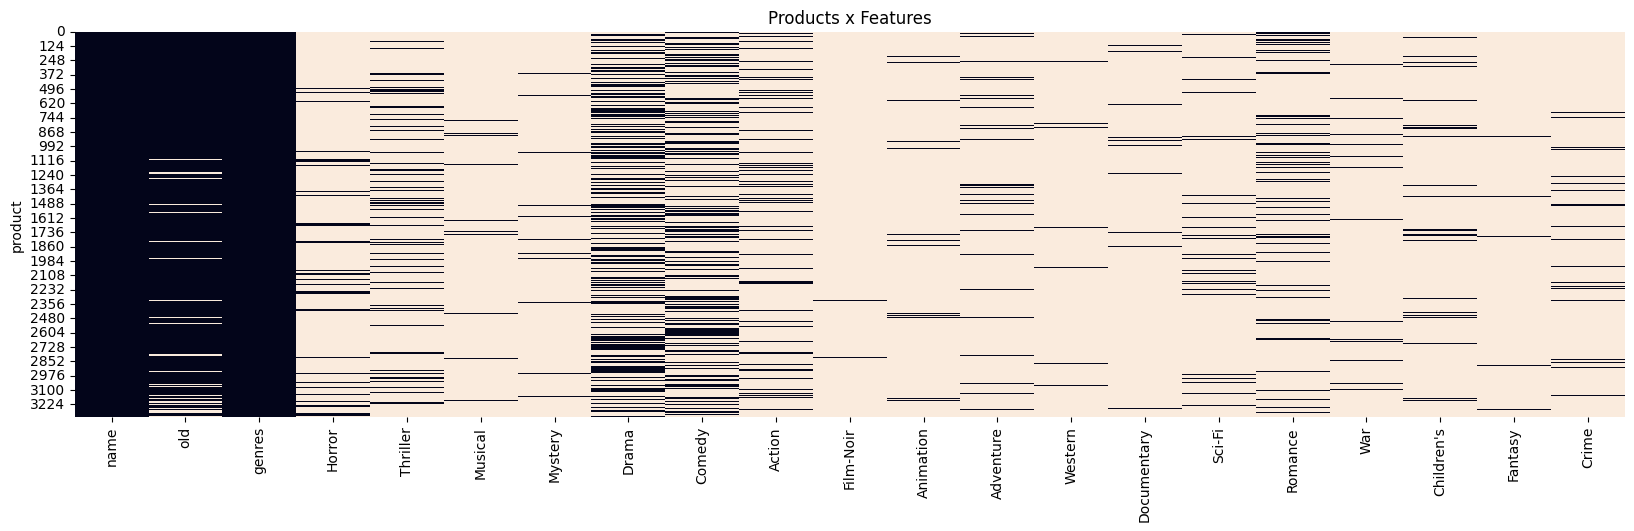

In [137]:
# Create a figure and axis object for the heatmap plot with a specified size
fig, ax = plt.subplots(figsize=(20, 5))

# Generate a heatmap using movies_df DataFrame, where values equal to 0 are shown as False (white) and values equal to 1 are shown as True (colored)
# vmin and vmax set the color range for the heatmap
# cbar=False removes the color bar from the plot
# ax=ax assigns the heatmap to the specified axis object
sns.heatmap(movies_df == 0, vmin=0, vmax=1, cbar=False, ax=ax).set_title("Products x Features")

# Display the plot
plt.show()

In [138]:
# Create a copy of the ratings_df DataFrame
tmp = ratings_df.copy()

# Pivot the ratings_df DataFrame to create a user-product matrix, with user IDs as the index, product IDs as the columns, and ratings as the values
ratings_df = tmp.pivot_table(index="user", columns="product", values="y")

# Find the missing columns (product IDs) in the ratings_df DataFrame by comparing with the index (product IDs) of the movies_df DataFrame
missing_cols = list(set(movies_df.index) - set(ratings_df.columns))

# For each missing column (product ID), add a new column in the ratings_df DataFrame with NaN values
for col in missing_cols:
    ratings_df[col] = np.nan

# Sort the columns of the ratings_df DataFrame in ascending order
ratings_df = ratings_df[sorted(ratings_df.columns)]

C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\4068809191.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratings_df[col] = np.nan
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\4068809191.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  ratings_df[col] = np.nan
C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\4068809191.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once usin

In [140]:
# Apply Min-Max scaling to normalize the values in the ratings_df DataFrame between the specified feature range (0.5 to 1)
# The scaler is fitted on the values of the ratings_df DataFrame, and the transformed values are stored in a new DataFrame called ratings_df
# The column names and index of the ratings_df DataFrame are preserved in the new DataFrame
ratings_df = pd.DataFrame(preprocessing.MinMaxScaler(feature_range=(0.5, 1)).fit_transform(ratings_df.values),
                          columns=ratings_df.columns, index=ratings_df.index)

c:\Users\jansc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
c:\Users\jansc\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


In [139]:
# Extract the feature columns from the movies_df DataFrame by dropping the "genres" and "name" columns
features = movies_df.drop(["genres", "name"], axis=1).columns

# Print the extracted feature columns
print(features)

# Extract the context columns from the dtf_context DataFrame by dropping the "user" and "product" columns
context = dtf_context.drop(["user", "product"], axis=1).columns

# Print the extracted context columns
print(context)

Index(['old', 'Horror', 'Thriller', 'Musical', 'Mystery', 'Drama', 'Comedy',
       'Action', 'Film-Noir', 'Animation', 'Adventure', 'Western',
       'Documentary', 'Sci-Fi', 'Romance', 'War', 'Children's', 'Fantasy',
       'Crime'],
      dtype='object')
Index(['daytime', 'weekend'], dtype='object')


In [141]:
# Calculate the split index based on 80% of the number of columns in the ratings_df DataFrame
split = int(0.8 * ratings_df.shape[1])

# Split the ratings_df DataFrame into training and test sets based on the calculated split index
dtf_train = ratings_df.loc[:, :split-1]
dtf_test = ratings_df.loc[:, split:]

# Stack the values of the ratings_df DataFrame, dropping NaN values, and reset the index
# Rename the stacked column to "y"
train = ratings_df.stack(dropna=True).reset_index().rename(columns={0: "y"})

# Add the extracted feature columns from the movies_df DataFrame to the training set
train = train.merge(movies_df[features], how="left", left_on="product", right_index=True)

# Add the context columns from the dtf_context DataFrame to the training set
train = train.merge(dtf_context, how="left")

# Stack the values of the dtf_test DataFrame, dropping NaN values, and reset the index
# Rename the stacked column to "y"
test = dtf_test.stack(dropna=True).reset_index().rename(columns={0: "y"})

# Add the extracted feature columns from the movies_df DataFrame to the test set
test = test.merge(movies_df[features], how="left", left_on="product", right_index=True)

# Insert static values of 0 for the context variables in the test set
test["daytime"] = 0
test["weekend"] = 0

The cleaned DataFrames are then used to build the hybrid recommendation system model. The model architecture combines collaborative filtering, neural networks, content-based filtering, and knowledge-based filtering. Collaborative filtering is employed by creating embeddings for user and product information, and the dot product between them is computed. Neural networks are utilized to capture complex relationships by creating additional embeddings for user and product information, which are then concatenated and passed through a dense layer. Content-based filtering is employed by applying dense layers to the movie features extracted from the movies_df DataFrame. Similarly, knowledge-based filtering involves applying dense layers to the context variables derived from the dtf_context DataFrame. All the outputs from these different components are concatenated and passed through a final dense layer to obtain the recommendation scores.

In [142]:
def build_model():
    """
    Build and compile the hybrid recommendation model.
    """
    # Set the size of embeddings
    embeddings_size = 50
    
    # Determine the number of users, products, features, and contexts based on the ratings_df DataFrame and the extracted features and context variables
    number_of_users, number_of_products = ratings_df.shape[0], ratings_df.shape[1]
    number_of_features = len(features)
    number_of_contexts = len(context)

    def create_embedding_block(input_layer, name, input_dim, output_dim=embeddings_size):
        """
        Create an embedding block for a given input layer.
        """
        # Create an embedding layer with the specified input dimension and output dimension
        embeddings = layers.Embedding(name=f"{name}_emb", input_dim=input_dim, output_dim=output_dim)(input_layer)
        
        # Reshape the embeddings layer to match the target shape (output_dim)
        reshaped = layers.Reshape(name=f'{name}', target_shape=(output_dim,))(embeddings)
        return reshaped

    # COLLABORATIVE FILTERING 
    # Define input layers for user and product
    user_input = layers.Input(name="user_input", shape=(1,))
    product_input = layers.Input(name="product_input", shape=(1,))

    # Create embedding blocks for user and product using the create_embedding_block function
    cf_users = create_embedding_block(user_input, "cf_users", number_of_users)
    cf_products = create_embedding_block(product_input, "cf_products", number_of_products)
    
    # Compute the dot product between the user and product embeddings
    cf_output = layers.Dot(name='cf_output', normalize=True, axes=1)([cf_users, cf_products])

    # Neural Network
    # Create embedding blocks for user and product using the create_embedding_block function
    nn_users = create_embedding_block(user_input, "nn_users", number_of_users)
    nn_products = create_embedding_block(product_input, "nn_products", number_of_products)
    
    # Concatenate the user and product embeddings
    nn_concat = layers.Concatenate()([nn_users, nn_products])
    
    # Apply a dense layer with the specified number of units and ReLU activation function
    nn_output = layers.Dense(name="nn_output", units=int(embeddings_size/2), activation='relu')(nn_concat)

    # CONTENT BASED
    # Define input layer for product features
    features_input = layers.Input(name="features_input", shape=(number_of_features,))
    
    # Apply a dense layer with the specified number of units and ReLU activation function to the product features
    features_output = layers.Dense(name="features_output", units=number_of_features, activation='relu')(features_input)

    # KNOWLEDGE BASED
    # Define input layer for context variables
    context_input = layers.Input(name="context_input", shape=(number_of_contexts,))
    
    # Apply a dense layer with the specified number of units and ReLU activation function to the context variables
    context_output = layers.Dense(name="context_output", units=number_of_contexts, activation='relu')(context_input)

    # OUTPUT
    # Merge all the outputs from different components
    final_output = layers.Concatenate()([cf_output, nn_output, features_output, context_output])
    
    # Apply a dense layer with a single unit and linear activation function as the final output layer
    final_output = layers.Dense(name="final_output", units=1, activation='linear')(final_output)

    # Compile the model using Adam optimizer, mean absolute error loss function, and mean absolute percentage error metric
    model = models.Model(inputs=[user_input, product_input, features_input, context_input], outputs=final_output, name="Hybrid_Model")
    model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_percentage_error'])

    return model

The model is trained using the training data, with early stopping implemented to prevent overfitting. The training process involves optimizing the model's parameters to minimize the mean absolute error loss function. Evaluation of the model is performed by selecting a specific user (user 2) and generating the top 5 recommendations for that user. The true positives and mean reciprocal rank (MRR) score are calculated to assess the performance of the recommendations.

Multiple variations of the model are created, trained, evaluated, and saved for future use. Each variation provides a unique perspective and potential improvement to the recommendation system.

In [143]:
def train_model(model):
  # Define early stopping
  early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=3)

  # Fit the model using training data
  model.fit(
    x=[train["user"], train["product"], train[features], train[context]],
    y=train["y"],
    epochs=100,
    batch_size=128,
    shuffle=True,
    verbose=0,
    validation_split=0.3,
    callbacks=[early_stopping]
  )
  
  return model

In [144]:
def train_model2(model):
  # Fit the model using training data
  model.fit(
    x=[train["user"], train["product"], train[features], train[context]],
    y=train["y"],
    epochs=100,
    batch_size=128,
    shuffle=True,
    verbose=0,
    validation_split=0.3
  )
  
  return model

In [126]:
def train_model3(model):
  # Define early stopping
  early_stopping = callbacks.EarlyStopping(monitor='val_loss', patience=10)

  # Fit the model using training data
  model.fit(
    x=[train["user"], train["product"], train[features], train[context]],
    y=train["y"],
    epochs=100,
    batch_size=128,
    shuffle=True,
    verbose=0,
    validation_split=0.3,
    callbacks=[early_stopping]
  )
  
  return model

In [145]:
def mean_reciprocal_rank(y_test, predicted):
    score = []
    for product in y_test:
        # Calculate the reciprocal rank for each product in y_test
        # If the product is in the predicted list, calculate the reciprocal rank as 1 divided by its index + 1
        # If the product is not in the predicted list, the reciprocal rank is 0
        mrr = 1 / (list(predicted).index(product) + 1) if product in predicted else 0
        score.append(mrr)
    
    # Calculate the mean of all the reciprocal ranks
    return np.mean(score)

In [146]:
def evaluate_model(model, i):
    # Subset the test data for user i
    test_user_i = test[test["user"] == i]
    
    # Make predictions for user i
    test_user_i["yhat"] = model.predict([test_user_i["user"], test_user_i["product"], test_user_i[features], test_user_i[context]])
    
    print("--- user", i, "---")
    top = 5
    y_test = test_user_i.sort_values("y", ascending=False)["product"].values[:top]
    print("y_test:", y_test)
    
    predicted = test_user_i.sort_values("yhat", ascending=False)["product"].values[:top]
    print("predicted:", predicted)
    
    true_positive = len(list(set(y_test) & set(predicted)))
    print("true positive:", true_positive, "("+str(round(true_positive/top*100,1))+"%)")
    
    print("mrr:", mean_reciprocal_rank(y_test, predicted))

In [147]:
model_path ='models/recommendation_model.h5'

if not os.path.isfile(model_path):
    # If the model file does not exist, build a new model, train it, evaluate it, save it, and load it
    model = build_model()
    model = train_model(model)
    evaluate_model(model, 2)
    model.save(model_path)
    model1 = load_model(model_path)
else:
    # If the model file exists, load the saved model and evaluate it
    model1 = load_model(model_path)
    evaluate_model(model1, 2)

1/1 [==============================] - 2s 2s/step
--- user 2 ---
y_test: [3021. 3105. 2706. 2910. 3004.]
predicted: [3021. 3261. 3070. 2910. 2706.]
true positive: 3 (60.0%)
mrr: 0.29


C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\3695464423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_user_i["yhat"] = model.predict([test_user_i["user"], test_user_i["product"], test_user_i[features], test_user_i[context]])


In [148]:
model_path2 ='models/recommendation_model2.h5'

if not os.path.isfile(model_path):
    # If the model file does not exist, build a new model, train it, evaluate it, save it, and load it
    model2 = build_model()
    model2 = train_model2(model2)
    evaluate_model(model2, 2)
    model2.save(model_path2)
    model2 = load_model(model_path2)
else:
    # If the model file exists, load the saved model and evaluate it
    model2 = load_model(model_path2)
    evaluate_model(model2, 2)

1/1 [==============================] - 4s 4s/step
--- user 2 ---
y_test: [3021. 3105. 2706. 2910. 3004.]
predicted: [3021. 3261. 3004. 3105. 2910.]
true positive: 4 (80.0%)
mrr: 0.35666666666666663


C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\3695464423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_user_i["yhat"] = model.predict([test_user_i["user"], test_user_i["product"], test_user_i[features], test_user_i[context]])


In [149]:
model_path3 ='models/recommendation_model3.h5'

if not os.path.isfile(model_path3):
    # If the model file does not exist, build a new model, train it, evaluate it, save it, and load it
    model3 = build_model()
    model3 = train_model3(model3)
    evaluate_model(model3, 2)
    model3.save(model_path3)
    model3 = load_model(model_path3)
else:
    # If the model file exists, load the saved model and evaluate it
    model3 = load_model(model_path3)
    evaluate_model(model3, 2)

1/1 [==============================] - 3s 3s/step
--- user 2 ---
y_test: [3021. 3105. 2706. 2910. 3004.]
predicted: [3261. 3105. 2910. 3070. 3021.]
true positive: 3 (60.0%)
mrr: 0.20666666666666664


C:\Users\jansc\AppData\Local\Temp\ipykernel_19192\3695464423.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_user_i["yhat"] = model.predict([test_user_i["user"], test_user_i["product"], test_user_i[features], test_user_i[context]])


Here we tried to do LIME XAI Testing. Unfortunately LIME does not support or model structure. We tried to use a different model structure but it did not work. We have included the code below for reference.

In [150]:
#LIME XAI Tests
import time
import lime
import lime.lime_tabular
# Subset the test data for user 2
test_user_i = test[test["user"] == 2]

def predict_fn(data):
    return model1.predict([test_user_i["user"], test_user_i["product"], test_user_i[features], test_user_i[context]])[:, 0]

explainer = lime.lime_tabular.LimeTabularExplainer(train.values, feature_names=train.columns, class_names=["y"], discretize_continuous=True, mode="classification")

# Choose an instance to explain, e.g., the first instance in the test data
instance = test_user_i.iloc[0]

exp = explainer.explain_instance(instance.values, predict_fn, num_features=5)

exp.show_in_notebook(show_table=True, show_all=False)


1/1 [==============================] - 0s 154ms/step


NotImplementedError: LIME does not currently support classifier models without probability scores. If this conflicts with your use case, please let us know: https://github.com/datascienceinc/lime/issues/16

SHAP generates local interpretable explanations by analyzing the neighborhood of each recommendation instance. SHAP, on the other hand, quantifies the importance of each feature in the recommendations and produces a summary plot to visualize the impact of different features.

In [151]:
#SHAP XAI Testing
import shap
from tensorflow.keras.models import load_model

x = np.concatenate([train["user"].values.reshape(-1, 1), train["product"].values.reshape(-1, 1), train[features], train[context]], axis=1)
y = train["y"].values
x_test = np.concatenate([test["user"].values.reshape(-1, 1), test["product"].values.reshape(-1, 1), test[features], test[context]], axis=1)
y_test = test.sort_values("y", ascending=False)["product"].values[:5]

X_train_summary = shap.kmeans(x, 3)

def print_accuracy(predictions):
    print("Root mean squared test error = {0}".format(np.sqrt(np.mean((predictions - y_test)**2))))
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

nn = MLPRegressor(solver='lbfgs', alpha=1e-1, hidden_layer_sizes=(5, 2), random_state=0)
nn.fit(x, y)

# Call nn.predict(x_test) to obtain the predictions
predictions = nn.predict(x_test)

# Reshape the predictions array to match the shape of y_test
predictions = predictions[:5]  # Take the first 5 predictions
predictions = predictions.reshape(-1)  # Reshape to (5,)

print_accuracy(predictions)

c:\Users\jansc\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
c:\Users\jansc\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
 

Root mean squared test error = 3104.1051590900333


In [152]:
# Create the SHAP explainer using KernelExplainer
explainer = shap.KernelExplainer(nn.predict, X_train_summary)

# Call shap_values with the test dataset
shap_values = explainer.shap_values(x_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, x_test)

  0%|          | 0/148044 [00:00<?, ?it/s]


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

### Model Selection

https://towardsdatascience.com/movielens-1m-deep-dive-part-ii-tensorflow-recommenders-4ca358cc886e

### Cross-Validation

## Feature Selection & Engineering

## Appliance in Machine Learning

## Appliance of XAI-Techniques